![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


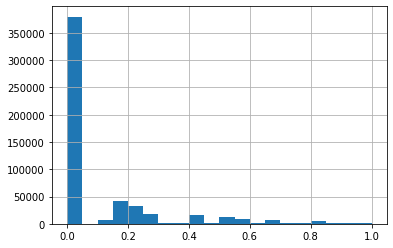

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist(bins=20)

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
# Creación de matrices de documentos usando CountVectorizer a partir de X
# El vocabulario generado es muy extenso por lo que se decide utilizar las 50 primeras
vect_A = CountVectorizer(stop_words='english', max_features=50, dtype=np.int8)
X_dtm_A = vect_A.fit_transform(X_train)
temp_A = X_dtm_A.todense()

# Entrenamiento (fit) del modelo RandomForestRegressor
regA = RandomForestRegressor()
regA.fit(X_dtm_A, y_train)

# transformar X_test
X_test_dtm_A = vect_A.transform(X_test)
temp_test_A = X_test_dtm_A.todense()

# Predecir
y_pred = regA.predict(temp_test_A)

# Mide desempeño
mse_A = metrics.mean_squared_error(y_pred, y_test.values)
print('MSE unigrama', mse_A)

MSE unigrama 0.041187334653097346


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
vect_B = CountVectorizer(stop_words='english', max_features=50, ngram_range=(3, 3))
X_dtm_B = vect_B.fit_transform(X_train)
temp_B = X_dtm_B.todense()

# Entrenamiento (fit) del modelo RandomForestRegressor
regB = RandomForestRegressor()
regB.fit(X_dtm_B, y_train)

# transformar X_test
X_test_dtm_B = vect_B.transform(X_test)
temp_test_B = X_test_dtm_B.todense()

# Predecir
y_pred = regB.predict(temp_test_B)

# Mide desempeño
mse_B = metrics.mean_squared_error(y_pred, y_test.values)
print('MSE trigrama', mse_B)

MSE trigrama 0.038978141677870726


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3
**TfidfVectorizer** utiliza la técnica **TF-IDF（Term Frequency-InversDocument Frequency）**, la cual es una técnica de ponderación que utiliza un método estadístico para calcular la importancia de una palabra en todo el corpus en función del número de veces que la palabra aparece en el texto y la frecuencia de los documentos que aparecen en todo el corpus. Su ventaja es que puede filtrar algunas palabras comunes pero irrelevantes, mientras retiene palabras importantes que afectan todo el texto.

## Componentes
**TF（Term Frequency）**: Indica la frecuencia de una palabra clave en todo el artículo.

**IDF（Inverse Document Frequency）**: Calcula la frecuencia del texto invertido. La frecuencia del texto se refiere al número de veces que aparece una palabra clave en todos los artículos de todo el corpus. Se utiliza principalmente para reducir el efecto de algunas palabras comunes en todos los documentos que tienen poco efecto en el documento.

## Método de cálculo
El **TF-IDF** se calcula multiplicando el componente local (frecuencia de palabras) y el componente global (frecuencia de documento inversa), y el documento resultante se normaliza a la longitud de la unidad. Cuanto mayor sea la importancia de una palabra para un artículo, mayor será su valor **TF-IDF**. Por lo tanto, las primeras palabras son las palabras clave de este artículo.

Fuente: https://programmerclick.com/article/7138217210/


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
vect_C = TfidfVectorizer(stop_words='english', max_features=50)
X_dtm_C = vect_C.fit_transform(X_train)
temp_C = X_dtm_C.todense()

# Entrenamiento (fit) del modelo RandomForestRegressor
regC = RandomForestRegressor()
regC.fit(X_dtm_C, y_train)

# transformar X_test
X_test_dtm_C = vect_C.transform(X_test)
temp_test_C = X_test_dtm_C.todense()

# Predecir
y_pred = regC.predict(temp_test_C)

# Mide desempeño
mse_C = metrics.mean_squared_error(y_pred, y_test.values)
print('MSE unigrama', mse_C)

# Trigrama
vect_D = TfidfVectorizer(stop_words='english', max_features=50, ngram_range=(3, 3))
X_dtm_D = vect_D.fit_transform(X_train)
temp_D = X_dtm_D.todense()

# Entrenamiento (fit) del modelo RandomForestRegressor
regD = RandomForestRegressor()
regD.fit(X_dtm_D, y_train)

# transformar X_test
X_test_dtm_D = vect_D.transform(X_test)
temp_test_D = X_test_dtm_D.todense()

# Predecir
y_pred = regD.predict(temp_test_D)

# Mide desempeño
mse_D = metrics.mean_squared_error(y_pred, y_test.values)
print('MSE trigrama', mse_D)

MSE unigrama 0.0399979951746219
MSE trigrama 0.038971544987900876


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

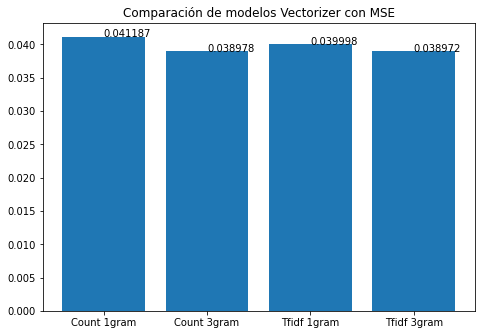

In [ ]:
# Celda 5
# Gráfica de los MSE de los modelos utilizados
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos Vectorizer con MSE")
ejeX = ['Count 1gram','Count 3gram' ,'Tfidf 1gram','Tfidf 3gram']
ejeY = [round(mse_A,6), round(mse_B,6), round(mse_C,6), round(mse_D,6)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

No fue posible desarrollar los modelos con todo el vocabulario de palabras debido a que la ejecución colapsaba la máquina, por lo que se decidió limitarlas con el hiperparámetro max_features=5 e irlo aumentando progresivamente hasta llegar a 50 en el que se encontró que mejoraba el MSE y tambien aumentaba el tiempo de ejecución pero era manejable.

De los modelos evaluados se identifica que el peor desempeño lo presenta el modelo CountVectorizer con unigrama con un MSE de 0.041187.

Al aplicar el modelo CountVectorizer con trigrama se obtiene una mejora con un MSE de 0.038978, ya que en este caso al utilizar conjuntos de tres palabras se esta obteniendo mayor información que se refleja en una mejor predicción de CountVectorizer.

Al evaluar el modelo TfidfVectorizer con unigrama se obtuvo un MSE de 0.039998, el cual es mejor que el primer modelo de unigrama ya que con la técnica TF-IDF（Term Frequency-InversDocument Frequency）se filtran las palabras comunes pero irrelevantes, mientras retiene las palabras importantes que afectan a todo el texto, pero en este caso no mejora el MSE del anterior modelo con trigrama.

Adicionalmetne se desarrolló el modelo TfidfVectorizer con trigrama obteniendo el mejor desempeño con un MSE de 0.038972, aunque su resultado es muy similar al anteior modelo con trigrama, por lo que en este caso se obtienen los mejores resultados de predicción utilizando trigramas con cualquiera de las dos técnicas de Counter o TfIdf.